In [1]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [4]:
!streamlit run dashboards/turnover_dashboard.py


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: dashboards/turnover_dashboard.py


In [6]:
print(model.feature_names_in_)

['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company' 'Work_accident'
 'promotion_last_5years' 'department_RandD' 'department_accounting'
 'department_hr' 'department_management' 'department_marketing'
 'department_product_mng' 'department_sales' 'department_support'
 'department_technical' 'salary_low' 'salary_medium']


2025-08-05 21:38:05.787 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 21:38:05.788 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 21:38:05.789 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 21:38:05.790 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 21:38:05.791 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 21:38:05.792 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 21:38:05.813 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 21:38:05.814 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


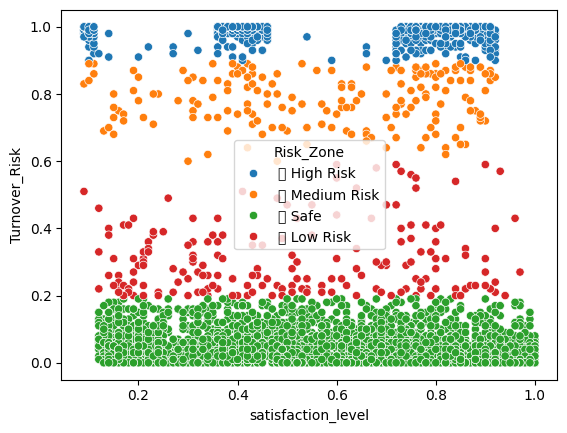

In [9]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import seaborn as sns

# List of expected features for the model
expected_features = [
    'satisfaction_level', 'last_evaluation', 'number_project',
    'average_montly_hours', 'time_spend_company', 'Work_accident',
    'promotion_last_5years', 'department_RandD', 'department_accounting',
    'department_hr', 'department_management', 'department_marketing',
    'department_product_mng', 'department_sales', 'department_support',
    'department_technical', 'salary_low', 'salary_medium'
]

# Load model and dataset
model = joblib.load('best_random_forest.pkl')
df = pd.read_csv('processed_dataset.csv')

# Filter columns to match expected features
df_model_input = df[expected_features]

# Make predictions
preds = model.predict_proba(df_model_input)[:, 1]
df['Turnover_Risk'] = preds

# Risk classification function
def classify_risk(prob):
    if prob < 0.2:
        return "🟢 Safe"
    elif prob < 0.6:
        return "🟡 Low Risk"
    elif prob < 0.9:
        return "🟠 Medium Risk"
    else:
        return "🔴 High Risk"

# Apply risk classification
df['Risk_Zone'] = df['Turnover_Risk'].apply(classify_risk)

# Streamlit app layout
st.title("Employee Turnover Risk Dashboard")

# Risk zone distribution bar chart
st.subheader("Risk Zone Distribution")
zone_counts = df['Risk_Zone'].value_counts()
st.bar_chart(zone_counts)

# Sample prediction data
st.subheader("Sample Predictions")
st.dataframe(df[['satisfaction_level', 'last_evaluation', 'Turnover_Risk', 'Risk_Zone']].head(10))

# Optional: satisfaction vs. risk scatter plot
st.subheader("Satisfaction vs. Turnover Risk")
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='satisfaction_level', y='Turnover_Risk', hue='Risk_Zone', ax=ax)
st.pyplot(fig)